# Adult Dataset
        

Demographic Parity Difference by Gender: 0.20
Demographic Parity Difference by Race: 0.60


C:\Users\duwayne.blok\AppData\Local\Temp\ipykernel_14168\2733153543.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Female', 'Male'], y=[p_female, p_male], palette='pastel')


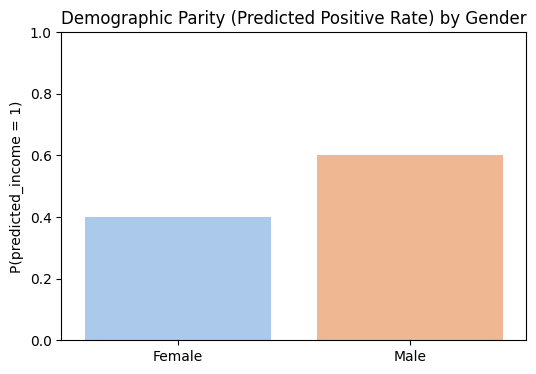

C:\Users\duwayne.blok\AppData\Local\Temp\ipykernel_14168\2733153543.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['White', 'Non-White'], y=[p_white, p_nonwhite], palette='coolwarm')


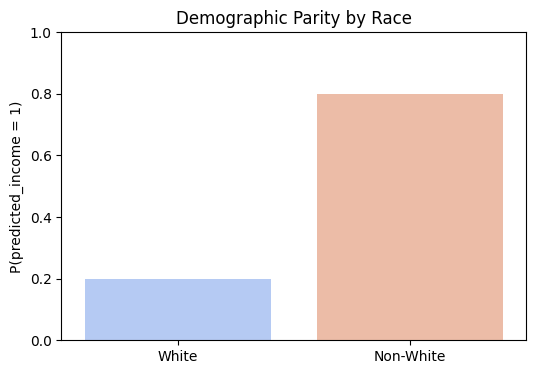

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create synthetic dataset
data = {
    "gender": [0, 0, 1, 1, 0, 1, 0, 1, 0, 1],  # 0 = Female, 1 = Male
    "race":   [1, 0, 1, 1, 0, 1, 1, 0, 0, 0],        # 0 = White, 1 = Non-White
    "predicted_income": [1, 0, 1, 1, 0, 0, 1, 1, 0, 0],  # 1 = income >50K
    "actual_income": [1, 0, 1, 0, 0, 0, 1, 1, 0, 0]
}

df = pd.DataFrame(data)

# Calculate Demographic Parity Difference
#BY GENDER
p_male = df[df['gender'] == 1]['predicted_income'].mean()
p_female = df[df['gender'] == 0]['predicted_income'].mean()
dpd_gender = abs(p_male - p_female)
print(f"Demographic Parity Difference by Gender: {dpd_gender:.2f}")

# RACE
p_white = df[df['race'] == 0]['predicted_income'].mean()
p_nonwhite = df[df['race'] == 1]['predicted_income'].mean()
dpd_race = abs(p_white - p_nonwhite)
print(f"Demographic Parity Difference by Race: {dpd_race:.2f}")


# Visualization
# BAR PLOT FOR: GENDER
plt.figure(figsize=(6,4))
sns.barplot(x=['Female', 'Male'], y=[p_female, p_male], palette='pastel')
plt.ylabel("P(predicted_income = 1)")
plt.title("Demographic Parity (Predicted Positive Rate) by Gender")
plt.ylim(0,1)
plt.show()

# BAR PLOT FOR : RACE
plt.figure(figsize=(6,4))
sns.barplot(x=['White', 'Non-White'], y=[p_white, p_nonwhite], palette='coolwarm')
plt.title("Demographic Parity by Race")
plt.ylabel("P(predicted_income = 1)")
plt.ylim(0, 1)
plt.show()



# fairlearn Notebook

Demographic Parity by Gender:
gender
0    0.4
1    0.6
Name: selection_rate, dtype: float64

Demographic Parity by Race:
race
0    0.2
1    0.8
Name: selection_rate, dtype: float64


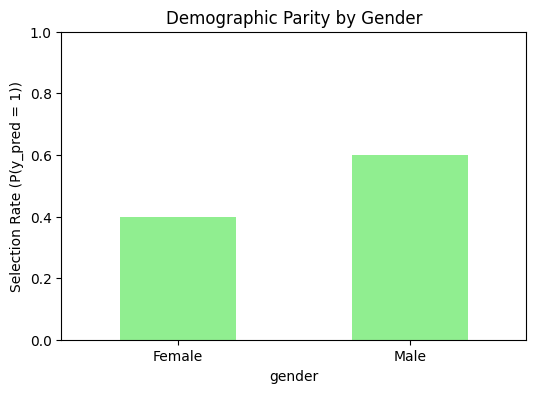

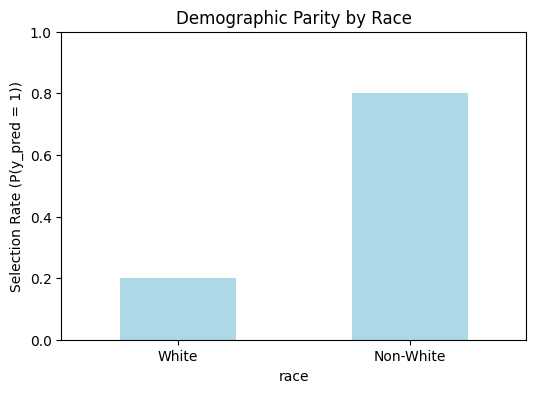

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fairlearn.metrics import MetricFrame, selection_rate

# Synthetic dataset with gender and race
data = {
    "gender": [0, 0, 1, 1, 0, 1, 0, 1, 0, 1],         # 0 = Female, 1 = Male
    "race":   [1, 0, 1, 1, 0, 1, 1, 0, 0, 0],         # 0 = White, 1 = Non-White
    "y_pred": [1, 0, 1, 1, 0, 0, 1, 1, 0, 0],
    "y_true": [1, 0, 1, 0, 0, 0, 1, 1, 0, 0]
}

df = pd.DataFrame(data)


# Calculate Demographic Parity Difference
# by gender
mf_gender = MetricFrame(metrics=selection_rate,
                        y_true=df["y_true"],
                        y_pred=df["y_pred"],
                        sensitive_features=df["gender"])

print("Demographic Parity by Gender:")
print(mf_gender.by_group)


# by race
mf_race = MetricFrame(metrics=selection_rate,
                      y_true=df["y_true"],
                      y_pred=df["y_pred"],
                      sensitive_features=df["race"])

print("\nDemographic Parity by Race:")
print(mf_race.by_group)


# Visualization
# BAR PLOT by gender
plt.figure(figsize=(6,4))
mf_gender.by_group.plot(kind='bar', color='lightgreen')
plt.title("Demographic Parity by Gender")
plt.ylabel("Selection Rate (P(y_pred = 1))")
plt.xticks(ticks=[0, 1], labels=["Female", "Male"], rotation=0)
plt.ylim(0,1)
plt.show()


# BAR PLOT by race
plt.figure(figsize=(6,4))
mf_race.by_group.plot(kind='bar', color='lightblue')
plt.title("Demographic Parity by Race")
plt.ylabel("Selection Rate (P(y_pred = 1))")
plt.xticks(ticks=[0, 1], labels=["White", "Non-White"], rotation=0)
plt.ylim(0,1)
plt.show()


# larger  dataset with diverse race group

Demographic Parity by Race:
race
Black       0.4
Coloured    0.5
Indian      0.5
White       0.4
Name: selection_rate, dtype: float64

Equal Opportunity (True Positive Rate) by Race:
race
Black       0.800000
Coloured    0.833333
Indian      0.800000
White       1.000000
Name: recall_score, dtype: float64


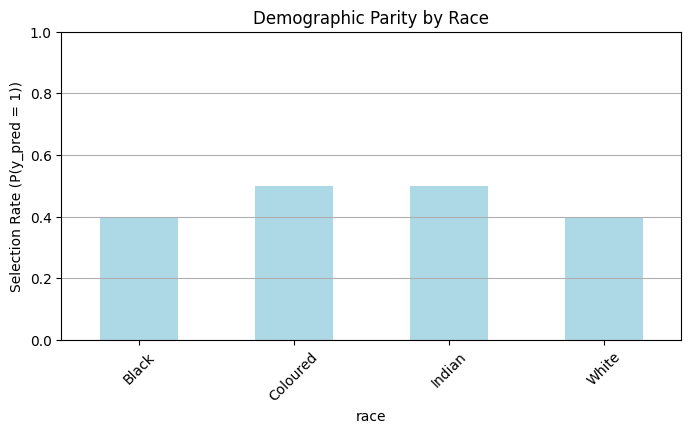

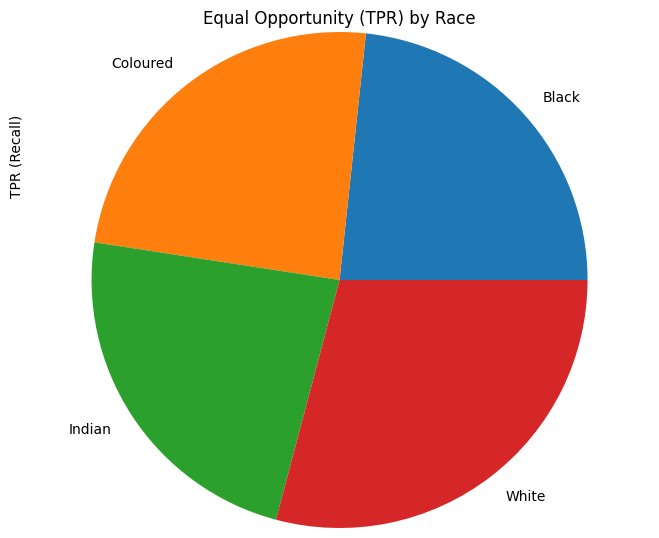

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fairlearn.metrics import MetricFrame, selection_rate
from sklearn.metrics import recall_score
import random

# Set random seed for reproducibility
random.seed(42)

# Create a larger synthetic dataset (40 entries: 10 per race group)
race_groups = ["White", "Black", "Coloured", "Indian"]
genders = [0, 1]  # 0 = Female, 1 = Male

data = {
    "gender": [],
    "race": [],
    "y_pred": [],
    "y_true": []
}

# Generate 10 records for each race group
for race in race_groups:
    for _ in range(10):
        gender = random.choice(genders)
        y_true = random.choice([0, 1])
        y_pred = y_true if random.random() > 0.2 else 1 - y_true  # 80% accuracy
        data["gender"].append(gender)
        data["race"].append(race)
        data["y_true"].append(y_true)
        data["y_pred"].append(y_pred)

df = pd.DataFrame(data)

# Demographic Parity by Race
mf_race_dp = MetricFrame(metrics=selection_rate,
                         y_true=df["y_true"],
                         y_pred=df["y_pred"],
                         sensitive_features=df["race"])

print("Demographic Parity by Race:")
print(mf_race_dp.by_group)

# Equal Opportunity (TPR) by Race
# Only consider y_true == 1 group members
mf_race_eo = MetricFrame(metrics=recall_score,
                         y_true=df["y_true"],
                         y_pred=df["y_pred"],
                         sensitive_features=df["race"])

print("\nEqual Opportunity (True Positive Rate) by Race:")
print(mf_race_eo.by_group)

# --- Visualizations ---

# Demographic Parity Plot
plt.figure(figsize=(8, 4))
mf_race_dp.by_group.plot(kind='bar', color='lightblue')
plt.title("Demographic Parity by Race")
plt.ylabel("Selection Rate (P(y_pred = 1))")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

# Equal Opportunity Plot
plt.figure(figsize=(8, 4))
mf_race_eo.by_group.plot(kind='pie', color='salmon')
plt.title("Equal Opportunity (TPR) by Race")
plt.ylabel("TPR (Recall)")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()


# LOCALIZED CSV

In [ ]:
import pandas as pd

# Load the original dataset
df = pd.read_csv("adult.csv")

# ----- LOCALIZE OCCUPATION -----
occupation_map_sa = {
    "Exec-managerial": "Senior Manager",
    "Prof-specialty": "Professional",
    "Craft-repair": "Artisan / Technician",
    "Adm-clerical": "Office Administrator",
    "Sales": "Salesperson",
    "Other-service": "General Service Worker",
    "Machine-op-inspct": "Machine Operator",
    "Transport-moving": "Driver / Transport",
    "Handlers-cleaners": "Cleaner / Handler",
    "Farming-fishing": "Farm Worker",
    "Tech-support": "IT Support",
    "Protective-serv": "Security / Police",
    "Priv-house-serv": "Domestic Worker",
    "Armed-Forces": "Military"
}

df["occupation_sa"] = df["occupation"].map(occupation_map_sa)

# ----- LOCALIZE EDUCATION -----
education_map_sa = {
    "Bachelors": "Bachelor's Degree",
    "HS-grad": "Matric",
    "Some-college": "Diploma / Incomplete Degree",
    "Masters": "Master's Degree",
    "Doctorate": "PhD / Doctorate",
    "Assoc-acdm": "Technical Diploma",
    "Assoc-voc": "Vocational Qualification",
    "9th": "Grade 9",
    "10th": "Grade 10",
    "11th": "Grade 11",
    "12th": "Grade 12",
    "7th-8th": "Grade 7-8",
    "5th-6th": "Grade 5-6",
    "1st-4th": "Grade 1-4",
    "Preschool": "Preschool",
    "Prof-school": "Professional School"
}

df["education_sa"] = df["education"].map(education_map_sa)

# ----- LOCALIZE INCOME -----
income_map_sa = {
    "<=50K": "<= R200,000",
    ">50K": "> R200,000"
}

df["income_sa"] = df["income"].map(income_map_sa)

# ----- SAVE THE FINAL DATASET -----
df.to_csv("adult_south_africa_fully_localized.csv", index=False)

print("✅ Localization complete! Saved as 'adult_south_africa_fully_localized.csv'")